In [ ]:
**I. Import Libraries and Read CSV Files**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

# read csv file
starData = pd.read_csv("/kaggle/input/star-dataset/6 class csv.csv", header=0, sep=',')

*Clean data and check type of each*

In [2]:
# data cleaning
starData.dropna(axis=0, inplace=True)  # modify origninal file

# data type consistency 
print("---Datatype Report---")
print(starData.info())

---Datatype Report---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 15.0+ KB
None


*Modify color value into one way of writing*

In [3]:
# modify colors spellings
starData['Star color'] = starData['Star color'].replace({\
'Blue ':'blue', 'Blue':'blue',\
'Blue White':'blue white', 'Blue white':'blue white', 'Blue white ':'blue white', 'Blue-White':'blue white','Blue-white':'blue white',\
'White':'white', 'Whitish':'white',\
'White-Yellow':'yellow white', 'Yellowish White':'yellow white', 'yellow-white':'yellow white',\
'Yellowish':'yellow', 'yellowish':'yellow',\
'Pale yellow orange':'pale yellow orange',\
'Orange':'orange', 'Orange-Red':'orange red', 'Red':'red'})

*Convert each color into a specific number 0-9*

In [4]:
# convert color to numeric
starData['Star color'] = starData['Star color'].replace({\
'red':1, 'orange red':2, 'orange':3,\
'pale yellow orange':4, 'yellow':5, 'yellow white':6,\
'white':7, 'blue white':8, 'blue':9})

*Compute correlation value between temperature and color*

In [5]:
print('Correlation between temperature and color:', starData['Temperature (K)'].corr(starData['Star color']))

Correlation between temperature and color: 0.7929186950988021


*Compute/output regression table. Find coef of linear regression. Find P value to test hypothesis*

In [6]:
# regression table
y = starData['Star color']
x = starData['Temperature (K)']
model = smf.ols('y ~ x', data=starData)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     403.0
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           4.05e-53
Time:                        00:15:16   Log-Likelihood:                -529.17
No. Observations:                 240   AIC:                             1062.
Df Residuals:                     238   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5512      0.212      7.331      0.0

*Plot temperature, star color, and linear regression*

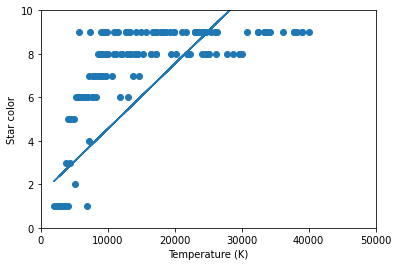

In [7]:
# linear regression graph
x = starData['Temperature (K)']
y = starData['Star color']

# get coefficient 
slope, intercept, r, p, std_err = stats.linregress(x, y)

# define linear regression equation
def myfunc(x):
 return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)  # plot data
plt.plot(x, mymodel)  # plot linear regression
plt.ylim(ymin=0, ymax=10)  
plt.xlim(xmin=0, xmax=50000)
plt.xlabel("Temperature (K)")
plt.ylabel ("Star color")
plt.show()